# LINEAR REGRESSOR ALGORITHM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Stellar.csv')
df.head()

SNo     Name Symbol                 Date      High       Low      Open  \
0    1  Stellar    XLM  2014-08-06 23:59:59  0.003402  0.002266  0.002373   
1    2  Stellar    XLM  2014-08-07 23:59:59  0.003042  0.002455  0.002686   
2    3  Stellar    XLM  2014-08-08 23:59:59  0.003243  0.002493  0.002493   
3    4  Stellar    XLM  2014-08-09 23:59:59  0.003710  0.002873  0.002884   
4    5  Stellar    XLM  2014-08-10 23:59:59  0.007620  0.003363  0.003497   

      Close         Volume     Marketcap  
0  0.002657   35819.800781  9.663695e+05  
1  0.002501  142864.000000  1.079148e+06  
2  0.002881   93707.796875  1.260109e+06  
3  0.003481  233579.000000  1.645185e+06  
4  0.004303  352737.000000  2.216012e+06

In [3]:
del df['SNo']
del df['Name']
del df['Symbol']
del df['Date']
del df['Marketcap']

In [4]:
df.head()

High       Low      Open     Close         Volume
0  0.003402  0.002266  0.002373  0.002657   35819.800781
1  0.003042  0.002455  0.002686  0.002501  142864.000000
2  0.003243  0.002493  0.002493  0.002881   93707.796875
3  0.003710  0.002873  0.002884  0.003481  233579.000000
4  0.007620  0.003363  0.003497  0.004303  352737.000000

In [5]:
df=df.dropna()

In [6]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume'], dtype='object')

In [7]:
x = df.drop(labels='Close', axis=1)
y = df.loc[:,'Close']

In [8]:
x

High       Low      Open        Volume
0     0.003402  0.002266  0.002373  3.581980e+04
1     0.003042  0.002455  0.002686  1.428640e+05
2     0.003243  0.002493  0.002493  9.370780e+04
3     0.003710  0.002873  0.002884  2.335790e+05
4     0.007620  0.003363  0.003497  3.527370e+05
...        ...       ...       ...           ...
2522  0.273359  0.252874  0.269148  3.487793e+08
2523  0.270331  0.259710  0.263304  3.310069e+08
2524  0.272314  0.259118  0.264254  3.376196e+08
2525  0.268272  0.252300  0.268272  3.359242e+08
2526  0.267757  0.253547  0.253931  3.604261e+08

[2527 rows x 4 columns]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  2021
NUMBER OF TEST DATASET      :  506
TOTAL NUMBER OF DATASET    :  2527


In [10]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  2021
NUMBER OF TEST DATASET      :  506
TOTAL NUMBER OF DATASET    :  2527


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [13]:
predicted = LR.predict(x_test)

In [14]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predicted)
print("THE R2 SCORE OF LINEAR REGRESSER IS :",R2*100)

THE R2 SCORE OF LINEAR REGRESSER IS : 98.25867530078578


In [15]:
from sklearn.metrics import rand_score
RAND = rand_score(y_test,predicted)
print("THE ACCURACY SCORE OF LINEAR REGRESSER IS :",RAND*100)

THE ACCURACY SCORE OF LINEAR REGRESSER IS : 100.0


In [16]:
from sklearn.metrics import explained_variance_score
EVS = explained_variance_score(y_test,predicted)
print("THE EXPLAINED VARIENCE SCORE OF LINEAR REGRESSER IS :",EVS)

THE EXPLAINED VARIENCE SCORE OF LINEAR REGRESSER IS : 0.9826405313390202


In [17]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,predicted)
print("THE MEAN SQUARED ERROR SCORE OF LINEAR REGRESSER IS :",MSE)

THE MEAN SQUARED ERROR SCORE OF LINEAR REGRESSER IS : 0.0003270942089262994


In [18]:
from sklearn.metrics import median_absolute_error
MAE = median_absolute_error(y_test,predicted)
print("THE MEAN ABSOLUTE ERROR SCORE OF LINEAR REGRESSER IS :",MAE)

THE MEAN ABSOLUTE ERROR SCORE OF LINEAR REGRESSER IS : 0.0004982816054119339


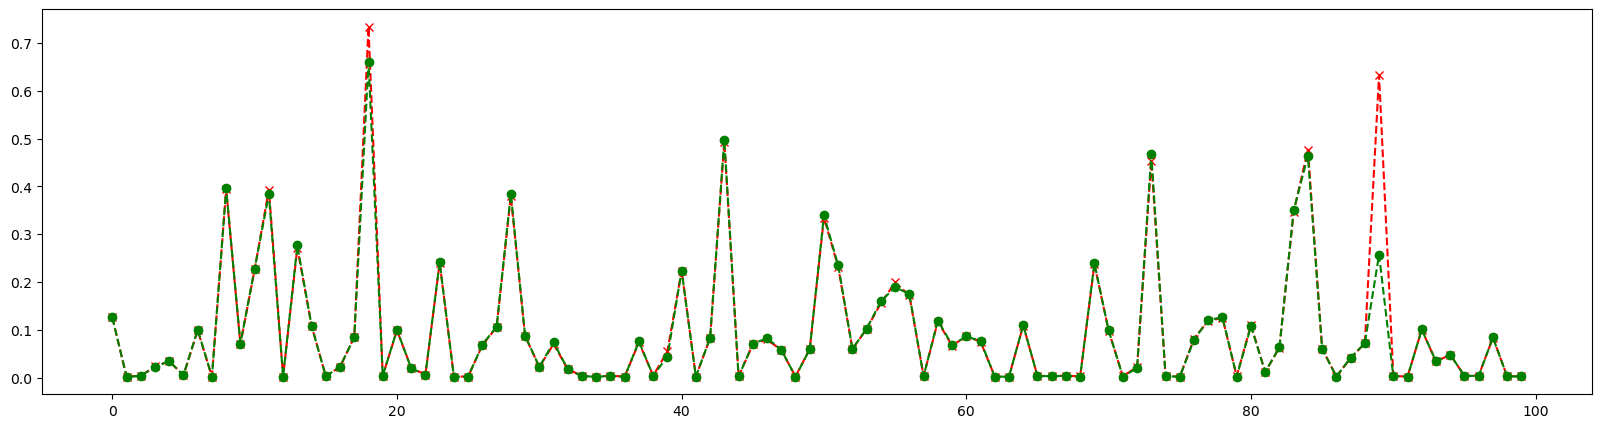

In [19]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [20]:
import joblib
joblib.dump(LR, 'STELLAR2.pkl')

['STELLAR2.pkl']

In [21]:
# import ydata_profiling as yp
# import pandas_profiling
# from pandas_profiling import ProfileReport
# from ydata_profiling.model import describe
# prof = ProfileReport(df)
# prof.to_file(output_file='stellar.html')